# Importing libraries

In [671]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [672]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Webscrapping

In [673]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [674]:
html

In [675]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [676]:
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [677]:
# Print out the text
text = soup.get_text()
#print(text)

In [678]:
all_links = soup.find_all('a')

for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [679]:
rows = soup.find_all('tr')
#print(rows[:10])

# Data cleaning

In [680]:
list_rows_ = []
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    cleantext = BeautifulSoup(str_cells, "lxml").get_text()
    list_rows_.append (cleantext)
print(cleantext)
type(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


str

In [681]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


In [682]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, ' ',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[ 577 ,  443 ,  

                    LIBBY B MITCHELL

                 ,  F ,  HILLSBORO ,  OR ,  1:41:18 ,  16:20 ,  1:42:10 ,   ]


str

In [683]:
df = pd.DataFrame(list_rows_)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [684]:
df1 = df [0].str.split (',', expand = True)

df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [685]:
df1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 10 columns):
0    582 non-null object
1    580 non-null object
2    577 non-null object
3    577 non-null object
4    577 non-null object
5    577 non-null object
6    577 non-null object
7    577 non-null object
8    577 non-null object
9    577 non-null object
dtypes: object(10)
memory usage: 45.6+ KB


In [686]:
df1.shape

(582, 10)

In [687]:
col_labels = soup.find_all('th')

In [688]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


In [689]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [690]:
df3 = df2 [0].str.split (',', expand = True)


In [691]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [692]:
df5 = df4.rename (columns = df4.iloc [0])
df5.head (10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [693]:
df5.columns = ['Place', ' Bib', ' Name', ' Gender', ' City', ' State', ' Chip Time',
       ' Chip Pace', ' Gun Time', ' Team']

In [694]:
df7 [' Name'] = df7 [' Name'].apply (lambda x : x.split ()).apply (lambda x : re.sub('[^A-Z]', '', str (x)))
df7 [' Team'] = df7 [' Team'].apply (lambda x : x.split ()).apply (lambda x : re.sub('[^A-Z]', '', str (x)))

In [695]:
df7 [' Team'].value_counts ().index 

Index(['N', 'DTNA', 'INTELTEAMN', 'INTELTEAMH', 'INTELTEAMM', 'INTELTEAMK',
       'INTELTEAMF', 'FXG', 'COLUMBIATEAMB', 'INTELTEAMD', 'INTELTEAMB',
       'INTELTEAMG', 'COLUMBIATEAMA', 'INTELTEAMI', 'INTELTEAMJ', 'INTELTEAME',
       'INTELTEAMA', 'COLUMBIATEAMC', 'COLUMBIATEAMD', 'INTELTEAMC',
       'INTELTEAML', 'COLUMBIATEAME'],
      dtype='object')

In [696]:
df7.loc [df7 [' Team'] == 'N', ' Team'] = 'None'

In [697]:
df7.head (10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JAREDWILSON,M,TIGARD,OR,36.350000,5:51,36:24,None
6,2,573,NATHANASUSTERSIC,M,PORTLAND,OR,36.700000,5:55,36:45,INTELTEAMF
7,3,687,FRANCISCOMAYA,M,PORTLAND,OR,37.733333,6:05,37:48,None
8,4,623,PAULMORROW,M,BEAVERTON,OR,38.566667,6:13,38:37,None
9,5,569,DEREKGOSBORNE,M,HILLSBORO,OR,39.350000,6:20,39:24,INTELTEAMF
10,6,642,JONATHONTRAN,M,PORTLAND,OR,39.816667,6:25,39:55,None
11,7,144,GEORGETOTONCHY,M,PORTLAND,OR,40.066667,6:27,40:17,None
12,8,395,BENJAMINCCHAFFIN,M,PORTLAND,OR,40.083333,6:27,40:09,None
13,9,7,BRANDONTHOMAS,M,None,None,40.283333,6:29,40:24,COLUMBIATEAMB
14,10,3,ERIKBJORNSTAD,M,None,None,40.350000,6:30,40:25,COLUMBIATEAMA


In [700]:
#df7 [' Chip Time'] = df7 [' Chip Time'].apply (lambda x : x.split (':')).apply (lambda x : int (x[0])*60 + int (x[1]) + int (x[2])/60 if len (x) == 3 else int (x[0]) + int (x[1])/60)

In [701]:
df7.head ()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JAREDWILSON,M,TIGARD,OR,36.350000,5:51,36:24,None
6,2,573,NATHANASUSTERSIC,M,PORTLAND,OR,36.700000,5:55,36:45,INTELTEAMF
7,3,687,FRANCISCOMAYA,M,PORTLAND,OR,37.733333,6:05,37:48,None
8,4,623,PAULMORROW,M,BEAVERTON,OR,38.566667,6:13,38:37,None
9,5,569,DEREKGOSBORNE,M,HILLSBORO,OR,39.350000,6:20,39:24,INTELTEAMF


# Data analysis and visualization

In [702]:
print (round (df7 [[' Chip Time']].describe (),2))

        Chip Time
count      577.00
mean        60.04
std         11.97
min         36.35
25%         51.00
50%         59.02
75%         67.27
max        101.30


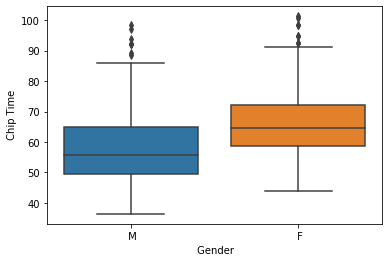

In [703]:
#male and female comparison
sns.boxplot(x=' Gender', y=' Chip Time', data=df7)

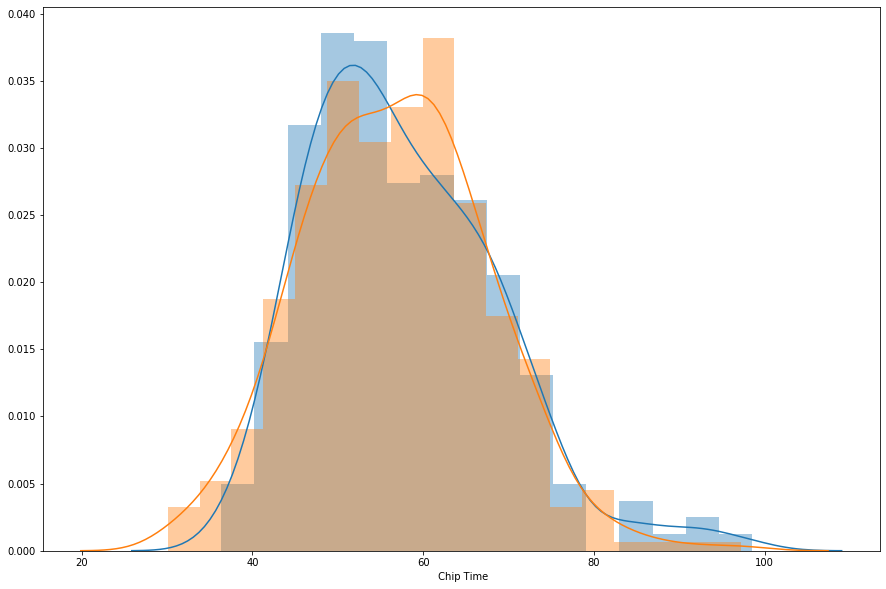

In [704]:
# normality check
plt.figure (figsize = (15,10))
ax1 = sns.distplot (df7.loc [df7 [' Gender'] == ' M',' Chip Time'], label = 'Male')
sns.distplot (np.random.normal (57.64, 11.01, 414), label = 'Normal', ax = ax1)

plt.show ()

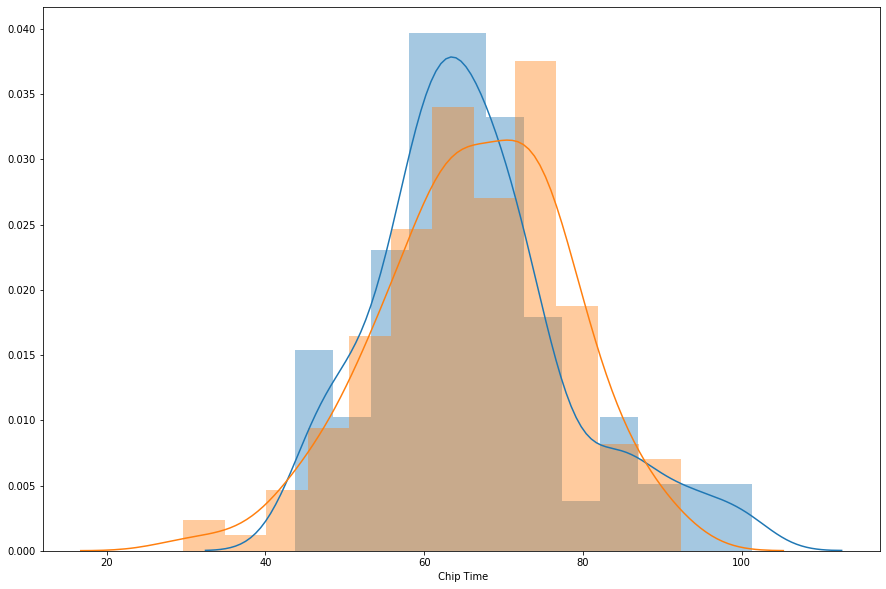

In [705]:
# normality check
plt.figure (figsize = (15,10))
ax2 = sns.distplot (df7.loc [df7 [' Gender'] == ' F',' Chip Time'], label = 'Female')
sns.distplot (np.random.normal (66.12, 12.18, 163), label = 'Normal', ax = ax2)

In [706]:
print (round (df7.loc [df7 [' Gender'] == ' M',' Chip Time'].describe (),2))

count    414.00
mean      57.64
std       11.01
min       36.35
25%       49.40
50%       55.79
75%       64.80
max       98.52
Name:  Chip Time, dtype: float64


In [707]:
print (round (df7.loc [df7 [' Gender'] == ' F',' Chip Time'].describe (),2))

count    163.00
mean      66.12
std       12.18
min       43.77
25%       58.76
50%       64.62
75%       72.06
max      101.30
Name:  Chip Time, dtype: float64
